<a href="https://colab.research.google.com/github/Jyotishmoy12/MachineLearning/blob/main/SOCUsingGradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's break down the entire process of predicting the State of Charge (SoC) of the battery using **linear regression** and explain the math behind each step.

### 1. **Data and Feature Selection**

We start by selecting the relevant features from the Excel sheet:
```python
X = data[['Voltage(V)', 'Current(A)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)']].values
y = data['Charge_Capacity(Ah)'].values  # SoC (or Charge Capacity)
```

#### **Intuition:**
- **X (Features)**: These are the variables that we use to predict the SoC. In our case, we use features such as `Voltage`, `Current`, etc.
- **y (Target)**: This is the actual value of the SoC (i.e., `Charge Capacity (Ah)`) that we are trying to predict.

### 2. **Adding the Bias Term**

```python
X_b = np.c_[np.ones((m, 1)), X]
```

#### **Math Behind It:**
We are adding a bias term (also called the intercept term) to the feature matrix \( X \). This is necessary because our linear regression model is of the form:

\[
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
\]

Here, \( w_0 \) is the bias term, which allows the model to fit data that doesn't pass through the origin.

### 3. **Cost Function: Mean Squared Error**

We define the cost function (Mean Squared Error):

```python
def compute_cost(X_b, y, weights):
    predictions = np.dot(X_b, weights)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost
```

#### **Math Behind It:**
The cost function for linear regression is the **Mean Squared Error (MSE)**, which measures how far the predicted values are from the actual values. The goal is to minimize this function.

\[
J(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
\]
Where:
- \( \hat{y}^{(i)} \) is the predicted value for the \(i\)-th data point.
- \( y^{(i)} \) is the actual value for the \(i\)-th data point.
- \( m \) is the number of data points.
- The factor \( \frac{1}{2m} \) is included to simplify the gradient later.

### 4. **Gradient Descent Algorithm**

```python
def gradient_descent(X_b, y, weights, learning_rate, iterations):
    for i in range(iterations):
        predictions = np.dot(X_b, weights)
        gradients = (1/m) * np.dot(X_b.T, (predictions - y))
        weights = weights - learning_rate * gradients
```

#### **Math Behind It:**
We use **gradient descent** to minimize the cost function. The basic idea of gradient descent is to update the weights in the direction that reduces the cost function.

1. **Prediction**:
   \[
   \hat{y}^{(i)} = \mathbf{X_b}^{(i)} \cdot \mathbf{w}
   \]
   This is the predicted output for the \(i\)-th example using the current weights.

2. **Gradient of Cost Function**:
   \[
   \frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)}
   \]
   This gives us the direction in which the weights need to be updated.

3. **Weight Update Rule**:
   \[
   w_j = w_j - \alpha \frac{\partial J}{\partial w_j}
   \]
   Here, \( \alpha \) is the learning rate, which controls how large the update steps are.

### 5. **Convergence Over Iterations**

We run gradient descent for a number of iterations, keeping track of the cost at each step:
```python
cost_history = np.zeros(iterations)
for i in range(iterations):
    cost_history[i] = compute_cost(X_b, y, weights)
```

#### **Math Behind It:**
With each iteration of gradient descent, the cost function \( J(\mathbf{w}) \) decreases (assuming a proper learning rate). We plot the cost over iterations to visually verify that the algorithm is converging.

### 6. **Visualization: Cost vs. Iterations**

```python
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.show()
```

#### **Intuition:**
As gradient descent progresses, the cost (MSE) should decrease with each iteration. This plot helps us visually confirm that the model is learning and the error is reducing.

### 7. **Prediction**

```python
def predict_soc(new_data, weights):
    new_data_b = np.c_[np.ones((1, 1)), np.array(new_data).reshape(1, -1)]  # Add bias term
    soc_prediction = np.dot(new_data_b, weights)
    return soc_prediction
```

#### **Math Behind It:**
After training, we use the learned weights \( \mathbf{w} \) to make predictions for new data points. The prediction is given by:

\[
\hat{y} = \mathbf{X_b} \cdot \mathbf{w}
\]

Here, \( \mathbf{X_b} \) includes the new feature values along with the bias term. The result \( \hat{y} \) is the predicted SoC.

### 8. **Predicted vs Actual Values**

```python
plt.scatter(y, predictions, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue')
plt.xlabel('Actual Charge Capacity (Ah)')
plt.ylabel('Predicted Charge Capacity (Ah)')
plt.show()
```

#### **Intuition:**
This plot compares the actual SoC values with the predicted values. Ideally, the points should lie along the diagonal line, indicating perfect predictions.

### 9. **Final SoC Prediction**

Finally, we can use the model to predict the SoC for new battery data:
```python
new_battery_data = [3.7, 0.5, 1.2, 10, 8]  # Example input
soc_prediction = predict_soc(new_battery_data, optimal_weights)
print(f"Predicted SoC (Ah): {soc_prediction}")
```

#### **Math Behind It:**
We apply the same learned model to new input data, multiply the input features by the weights (along with the bias), and predict the SoC for the battery.

### Conclusion:

- **Cost Function**: Helps us measure the error in our predictions.
- **Gradient Descent**: Updates the weights iteratively to minimize the cost function.
- **Prediction**: Uses the learned weights to predict the SoC for new battery data points.

Each step follows a mathematical foundation where we are minimizing the error (MSE) by updating the weights to get more accurate predictions over time.

Iteration 0, Cost: 0.052099430058468545
Iteration 100, Cost: 0.00061695015567031
Iteration 200, Cost: 8.763072795269187e-05
Iteration 300, Cost: 4.68133775631693e-05
Iteration 400, Cost: 3.930311406190868e-05
Iteration 500, Cost: 3.675347835654101e-05
Iteration 600, Cost: 3.575479792210621e-05
Iteration 700, Cost: 3.5353292092568155e-05
Iteration 800, Cost: 3.518911364564023e-05
Iteration 900, Cost: 3.5119649379987324e-05


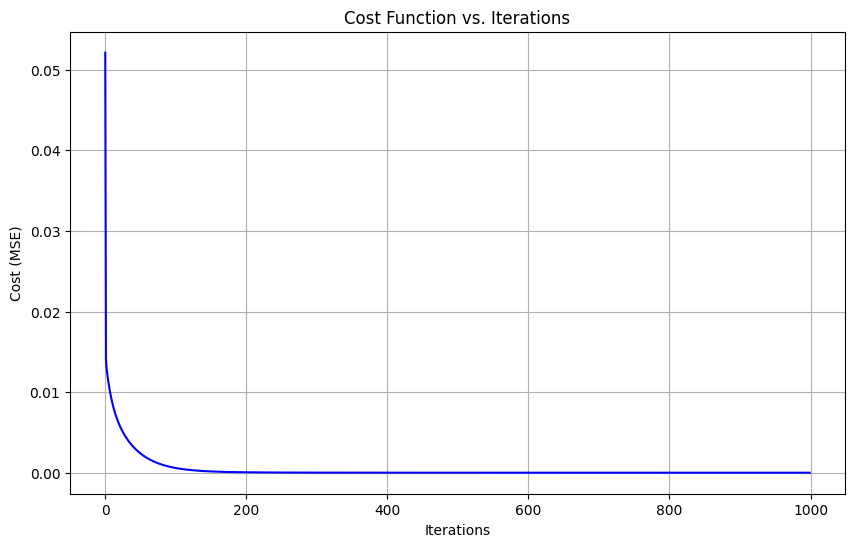

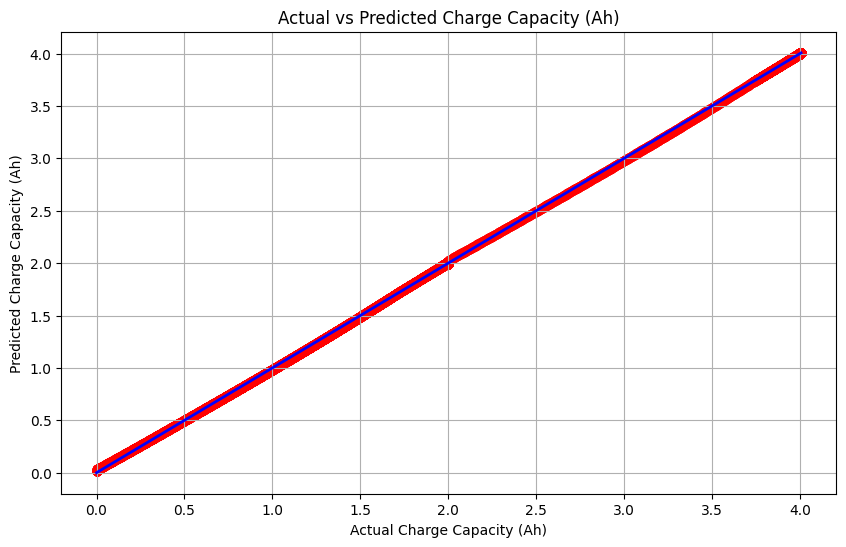

Predicted SoC (Ah): [2.57674155]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load data from Excel file
data = pd.read_excel('10_16_2015_Initial capacity_SP20-1.xlsx')

# Step 2: Select relevant columns for features (X) and target (y)
X = data[['Voltage(V)', 'Current(A)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)']].values
y = data['Charge_Capacity(Ah)'].values  # SoC (or Charge Capacity)

# Step 3: Add bias term (column of ones for intercept term)
m = len(y)  # Number of data points
X_b = np.c_[np.ones((m, 1)), X]  # Add bias term to X (intercept)

# Step 4: Initialize weights to zero
weights = np.zeros(X_b.shape[1])

# Define learning rate and number of iterations
learning_rate = 0.01
iterations = 1000

# Step 5: Define the cost function (Mean Squared Error)
def compute_cost(X_b, y, weights):
    m = len(y)
    predictions = np.dot(X_b, weights)  # y_hat = X_b . weights
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

# Step 6: Gradient Descent Algorithm
def gradient_descent(X_b, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = np.dot(X_b, weights)  # y_hat = X_b . weights
        gradients = (1/m) * np.dot(X_b.T, (predictions - y))  # Gradient for each weight
        weights = weights - learning_rate * gradients  # Update weights

        cost_history[i] = compute_cost(X_b, y, weights)  # Keep track of cost at each iteration
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost_history[i]}")

    return weights, cost_history

# Step 7: Run gradient descent to get optimal weights
optimal_weights, cost_history = gradient_descent(X_b, y, weights, learning_rate, iterations)

# Step 8: Plot the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

# Step 9: Predicted vs Actual Values
predictions = np.dot(X_b, optimal_weights)

plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', lw=2)  # Diagonal line (perfect prediction)
plt.title('Actual vs Predicted Charge Capacity (Ah)')
plt.xlabel('Actual Charge Capacity (Ah)')
plt.ylabel('Predicted Charge Capacity (Ah)')
plt.grid(True)
plt.show()

# Step 10: Predict SoC (charge capacity) for new data
def predict_soc(new_data, weights):
    new_data_b = np.c_[np.ones((1, 1)), np.array(new_data).reshape(1, -1)]  # Add bias term to new data
    soc_prediction = np.dot(new_data_b, weights)
    return soc_prediction

# Example of predicting SoC for a new battery data point
new_battery_data = [3.7, 0.5, 1.2, 10, 8]  # Example input
soc_prediction = predict_soc(new_battery_data, optimal_weights)
print(f"Predicted SoC (Ah): {soc_prediction}")
